In [1]:
import os 

# key = image name without directory path
# value = dict of filepaths of original and scaled images
images = {}
# file_path = images[<image name>][<scale>]
main_dir = 'data/DIV2K'
Kscale = ['LRbicx2', 'LRbicx3', 'LRbicx4']
Uscale = ['LRunkx2', 'LRunkx3', 'LRunkx4']


train_names = os.listdir(main_dir + '/' + 'DIV2K_train_HR')
valid_names = os.listdir(main_dir + '/' + 'DIV2K_valid_HR')

for image_name in train_names:
    image_scales = {}
    image_scales['original'] = main_dir + '/' + 'DIV2K_train_HR' + '/' + image_name
    for scale in Kscale:
        s = ''
        sc = ''
        if(scale == 'LRbicx2'):
            s = 'x2'
            sc = 'X2'
        elif(scale == 'LRbicx3'):
            s = 'x3'
            sc = 'X3'
        else:
            s = 'x4'
            sc = 'X4'
            
        corr_name = image_name[:4] + s + image_name[4:]
        image_scales[scale] = main_dir + '/' + 'DIV2K_train_LR_bicubic' + '/' + sc + '/' + corr_name
    for scale in Uscale:
        s = ''
        sc = ''
        if(scale == 'LRunkx2'):
            s = 'x2'
            sc = 'X2'
        elif(scale == 'LRunkx3'):
            s = 'x3'
            sc = 'X3'
        else:
            s = 'x4'
            sc = 'X4'
            
        corr_name = image_name[:4] + s + image_name[4:]
        image_scales[scale] = main_dir + '/' + 'DIV2K_train_LR_unknown' + '/' + sc + '/' + corr_name
    images[image_name] = image_scales
for image_name in valid_names:
    image_scales = {}
    image_scales['original'] = main_dir + '/' + 'DIV2K_valid_HR' + '/' + image_name
    for scale in Kscale:
        s = ''
        sc = ''
        if(scale == 'LRbicx2'):
            s = 'x2'
            sc = 'X2'
        elif(scale == 'LRbicx3'):
            s = 'x3'
            sc = 'X3'
        else:
            s = 'x4'
            sc = 'X4'
            
        corr_name = image_name[:4] + s + image_name[4:]
        image_scales[scale] = main_dir + '/' + 'DIV2K_valid_LR_bicubic' + '/' + sc + '/' + corr_name
    for scale in Uscale:
        s = ''
        sc = ''
        if(scale == 'LRunkx2'):
            s = 'x2'
            sc = 'X2'
        elif(scale == 'LRunkx3'):
            s = 'x3'
            sc = 'X3'
        else:
            s = 'x4'
            sc = 'X4'
        corr_name = image_name[:4] + s + image_name[4:]
        image_scales[scale] = main_dir + '/' + 'DIV2K_valid_LR_unknown' + '/' + sc + '/' + corr_name        
    images[image_name] = image_scales

print("Number of images: " + str(len(images)))

Number of images: 900


In [3]:
import numpy as np
import keras
import dictionary

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, scale, batch_size=5, shuffle=True):
        'Initialization'
        self.images = dictionary.training_dict()
        
        self.scale = scale
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.list_IDs = list(self.images.keys())
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # Generate data
        X = self.__data_generation(list_IDs_temp)
        return X

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' 
        # Initialization
        LR = []
        HR = []
        # Generate data
        for ID in list_IDs_temp:
            low_res = keras.preprocessing.image.load_img(self.images[ID][self.scale])
            high_res = keras.preprocessing.image.load_img(self.images[ID]['original'])
            LR.append(np.asarray(low_res))
            HR.append(np.asarray(high_res))
            
        return LR, HR

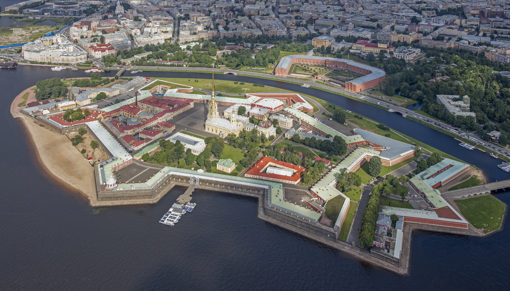

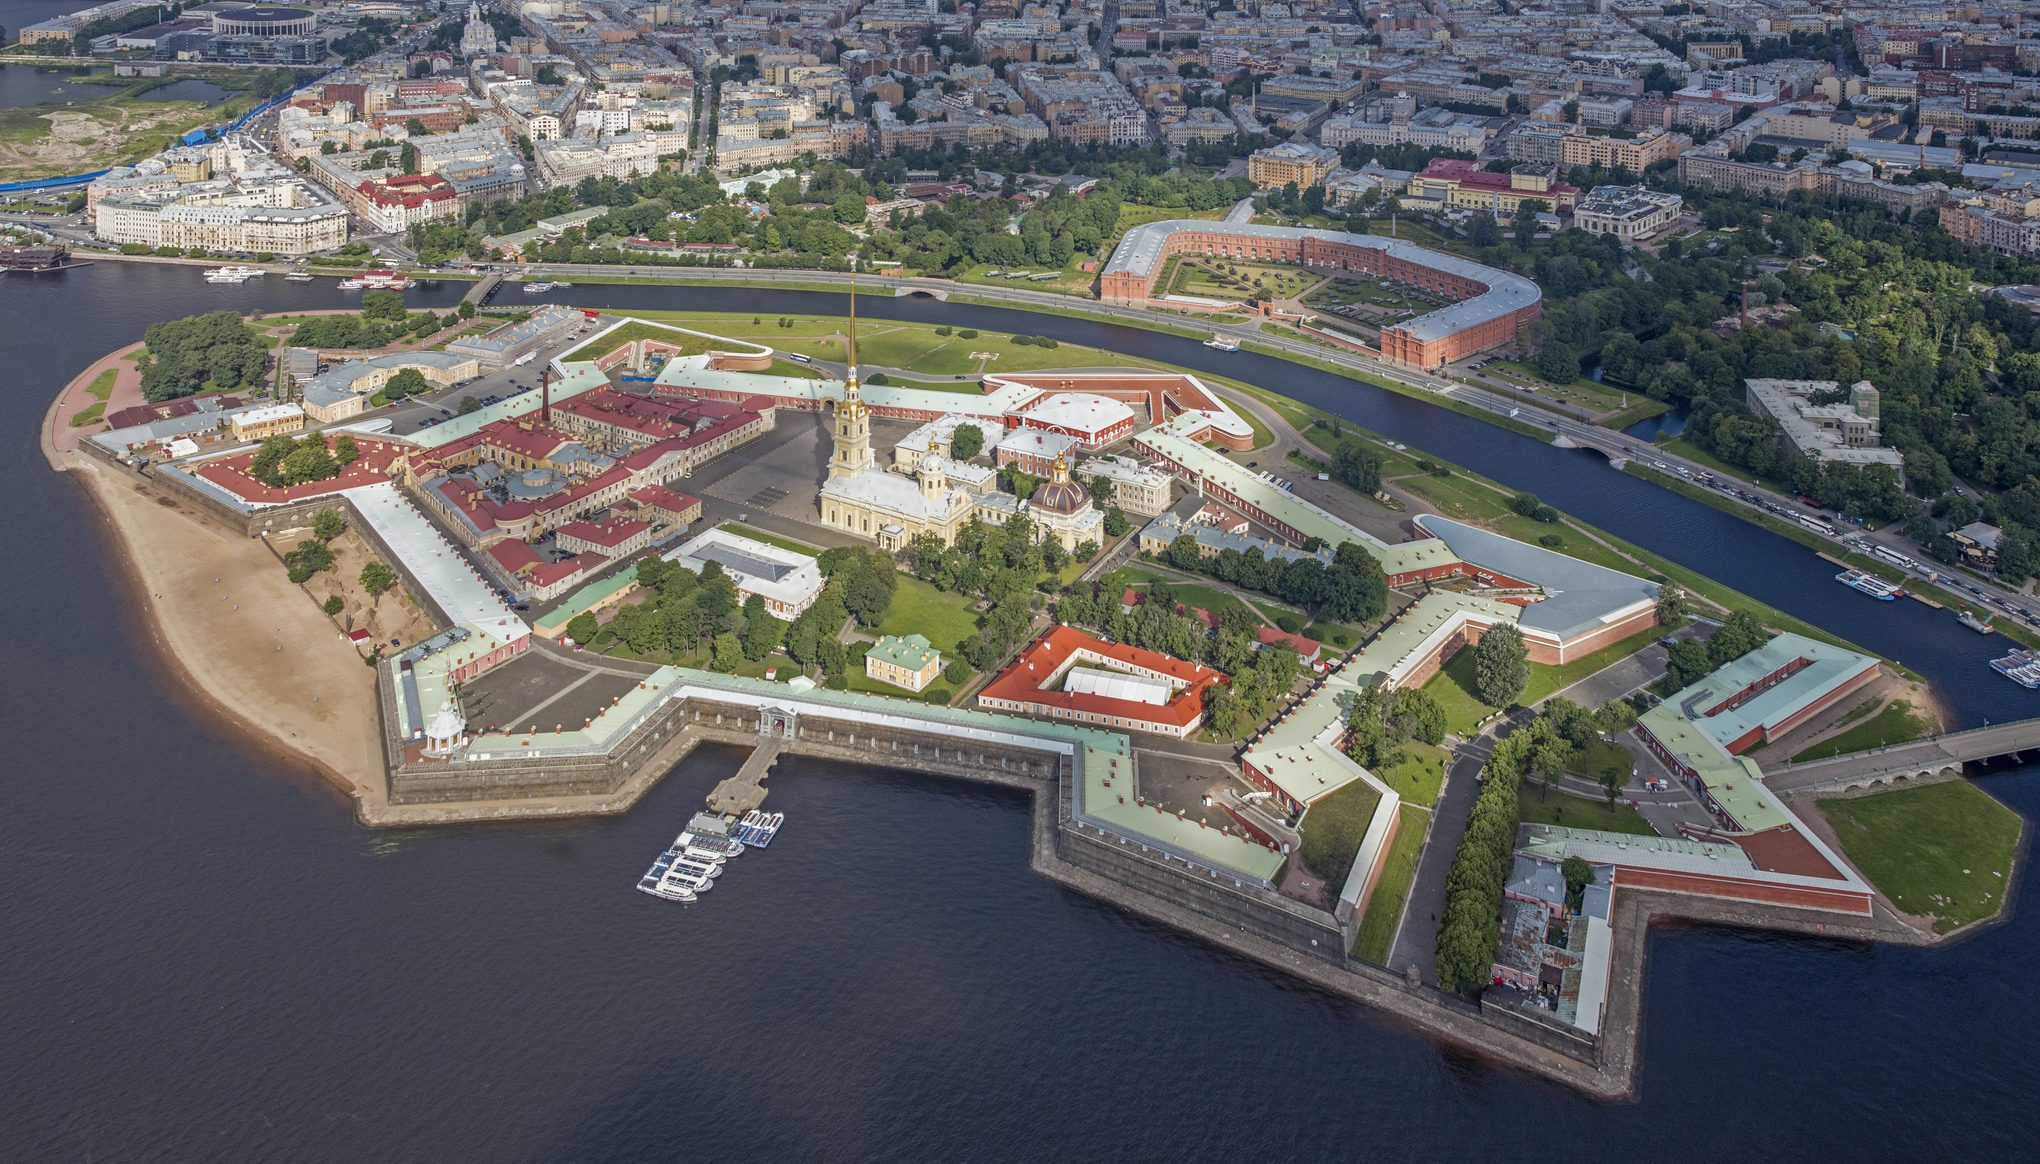

In [4]:
from PIL import Image
import numpy as np

gen = DataGenerator('LRbicx4', 1)
LR, HR = gen.__getitem__(0)
lr = Image.fromarray(LR[0], 'RGB')
hr = Image.fromarray(HR[0], 'RGB')
display(lr)
display(hr)